### **경사하강법(Gradient Descent)에 대한 설명, 코드 구현 및 시각화**

경사하강법(Gradient Descent)은 머신러닝 및 딥러닝에서 모델의 손실 함수를 최소화하기 위해 사용되는 최적화 알고리즘입니다.  
 이 알고리즘은 현재 가중치와 바이어스의 값에서 손실 함수의 기울기를 계산하고, 그 기울기를 따라 가중치와 바이어스를 업데이트하여 최적의 값을 찾아갑니다.   
  이번 섹션에서는 경사하강법의 개념을 수학적으로 설명하고, Python과 NumPy를 활용한 간단한 코드 구현과 시각화를 통해 경사하강법의 동작 원리를 이해해보겠습니다.



---

## **1. 경사하강법(Gradient Descent)의 개념**

### **1.1. 최적화 문제**

머신러닝 모델은 주어진 데이터에 대해 예측을 수행하며, 예측의 정확성을 평가하기 위해 손실 함수(Loss Function)를 사용합니다. 손실 함수는 모델의 예측값과 실제 값 간의 차이를 측정하는 함수로, 손실 함수를 최소화하는 것이 모델 학습의 목표입니다.

$$
\text{손실 함수} $$
$$\quad{L}(\theta) = \frac{1}{m} \sum_{i=1}^{m} \text{Loss}(y^{(i)}, \hat{y}^{(i)})
$$

여기서:
- 𝜃는 모델의 파라미터(가중치와 바이어스)
- 𝑚은 데이터 샘플의 수
- 𝑦(𝑖)는 실제 값
- 𝑦̂(𝑖)는 모델의 예측 값

### **1.2. 경사하강법의 원리**

경사하강법은 손실 함수 𝐿(𝜃)의 현재 파라미터 𝜃에서의 기울기(Gradient)를 계산하고, 이 기울기의 반대 방향으로 파라미터를 업데이트하여 손실을 최소화합니다. 수학적으로는 다음과 같이 표현됩니다.


$$
\theta := \theta - \eta \cdot\nabla\text{L}(\theta)
$$

여기서:
- 𝜂는 학습률(Learning Rate)로, 업데이트의 크기를 조절하는 하이퍼파라미터입니다.  
- 𝐿(𝜃)는 손실 함수의 기울기 벡터로, 각 파라미터에 대한 손실 함수의 편미분으로 구성됩니다.

### **1.3. 경사하강법의 종류**

1. **배치 경사하강법(Batch Gradient Descent):**
   - 전체 데이터셋을 사용하여 기울기를 계산하고, 파라미터를 업데이트합니다.
   - 계산이 안정적이지만, 큰 데이터셋에서는 메모리와 시간이 많이 소요될 수 있습니다.

2. **확률적 경사하강법(Stochastic Gradient Descent, SGD):**
   - 한 번에 하나의 데이터 샘플을 사용하여 기울기를 계산하고, 파라미터를 업데이트합니다.
   - 계산이 빠르고 실시간 업데이트가 가능하지만, 기울기가 노이즈가 많아 손실 함수의 최솟값 주변을 진동할 수 있습니다.

3. **미니배치 경사하강법(Mini-Batch Gradient Descent):**
   - 작은 배치 단위로 데이터를 묶어 기울기를 계산하고, 파라미터를 업데이트합니다.
   - 배치 경사하강법과 확률적 경사하강법의 장점을 모두 가지며, 실무에서 가장 널리 사용됩니다.

---

## **2. 경사하강법의 수학적 설명**

경사하강법의 핵심은 손실 함수의 기울기를 계산하여, 이 기울기의 반대 방향으로 파라미터를 업데이트하는 것입니다. 이를 위해 다음과 같은 단계가 필요합니다.

### **2.1. 손실 함수의 기울기 계산**

손실 함수 \$\text L (\theta) $의 각 파라미터 \( \theta_j \)에 대한 기울기(편미분)를 계산합니다.  
  
$$
\frac{\partial \text{L}}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \frac{\partial \text{Loss}(y^{(i)}, \hat{y}^{(i)})}{\partial \theta_j}
$$

### **2.2. 파라미터 업데이트**

계산된 기울기를 사용하여 파라미터를 업데이트합니다.

$$
\theta_j := \theta_j - \eta \cdot \frac{\partial \text{L}}{\partial \theta_j}
$$

이 과정을 손실 함수가 충분히 작아질 때까지 반복합니다.

---

## **3. 파이썬과 NumPy를 활용한 경사하강법 구현**

이번 섹션에서는 단순한 2차 함수의 최솟값을 찾는 예제를 통해 경사하강법을 구현해보겠습니다. 이를 통해 경사하강법의 동작 원리를 명확히 이해할 수 있습니다.

### **3.1. 예제: 2차 함수의 최솟값 찾기**

함수 f(x, y) = x² + y²의 최솟값을 찾는 문제를 예제로 삼겠습니다. 이 함수는 원점 (0, 0)에서 최소값을 가집니다.

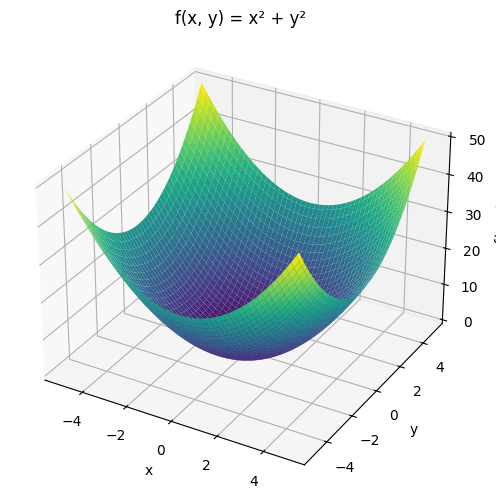

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# x, y 값 생성
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 함수 정의
Z = X**2 + Y**2

# 3D 그래프 그리기
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

ax.set_title('f(x, y) = x² + y²')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 2차 함수 정의
def f(x, y):
    return x**2 + y**2

# 함수의 기울기 계산
def grad_f(x, y):
    df_dx = 2 * x
    df_dy = 2 * y
    return np.array([df_dx, df_dy])

# 경사하강법 구현
def gradient_descent(grad_func, initial_point, learning_rate, epochs):
    point = np.array(initial_point, dtype='float64')
    history = [point.copy()]

    for i in range(epochs):
        grad = grad_func(point[0], point[1])
        point -= learning_rate * grad
        history.append(point.copy())

        # 수렴 조건 (기울기가 매우 작을 때 종료)
        # 1e-6 = 0.000001
        if np.linalg.norm(grad) < 1e-6:
            print(f"수렴 시점: {i+1} 에포크")
            break


    return np.array(history)

# 초기점, 학습률, 에포크 수 설정
initial_point = [5, 5]
learning_rate = 0.1
epochs = 100

# 경사하강법 수행
history = gradient_descent(grad_f, initial_point, learning_rate, epochs)

# 결과 출력
print("최종 점:", history[-1])
print("최종 함수 값:", f(history[-1][0], history[-1][1]))

수렴 시점: 75 에포크
최종 점: [2.69599467e-07 2.69599467e-07]
최종 함수 값: 1.4536774485912155e-13


- 2.69599467e-07 = 0.000000269599467
- 1.4536774485912155e-13 = 0.00000000000014536774485912155



### **3.2. 코드 구현**

**코드 설명:**
- 함수 f(x, y) = x² + y²와 그 기울기 ∇f(x, y) = [2x, 2y]를 정의합니다.
- `gradient_descent` 함수는 초기점, 학습률, 에포크 수를 받아 경사하강법을 수행합니다.
- 각 에포크마다 현재 점의 기울기를 계산하고, 학습률에 비례하여 점을 업데이트합니다.
- 업데이트된 점을 `history`에 저장하여 나중에 시각화할 수 있도록 합니다.

### **3.3. 시각화**

경사하강법의 경로를 2차 함수의 등고선 위에 시각화하여, 최솟값으로 수렴하는 과정을 확인해보겠습니다.

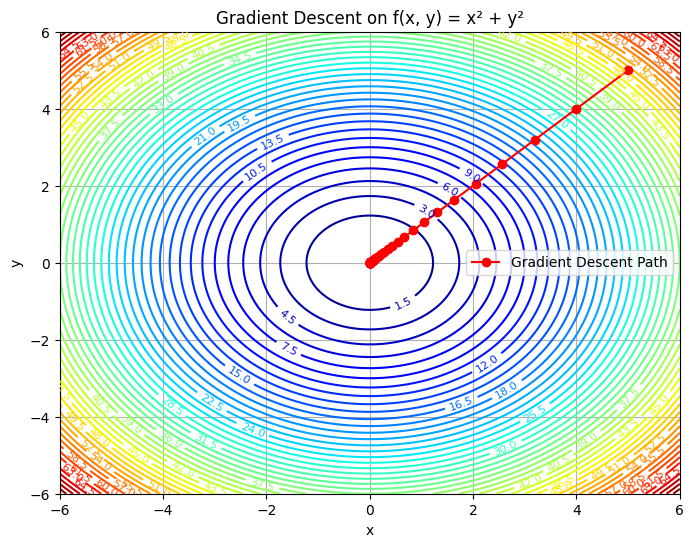

In [ ]:
# 시각화
x = np.linspace(-6, 6, 400)
y = np.linspace(-6, 6, 400)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, levels=50, cmap='jet')
plt.clabel(contour, inline=1, fontsize=8)
plt.plot(history[:,0], history[:,1], 'ro-', label='Gradient Descent Path')
plt.title('Gradient Descent on f(x, y) = x² + y²')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### **3.4. 다차원 시각화**

2차원 함수의 경우 경사하강법을 쉽게 시각화할 수 있지만, 다차원 함수에서는 이를 직접적으로 시각화하기 어렵습니다. 대신, 3차원 그래프나 애니메이션을 활용하여 경사하강법의 동작을 이해할 수 있습니다. 여기서는 3차원 플롯을 통해 2차원 경로를 시각화해보겠습니다.

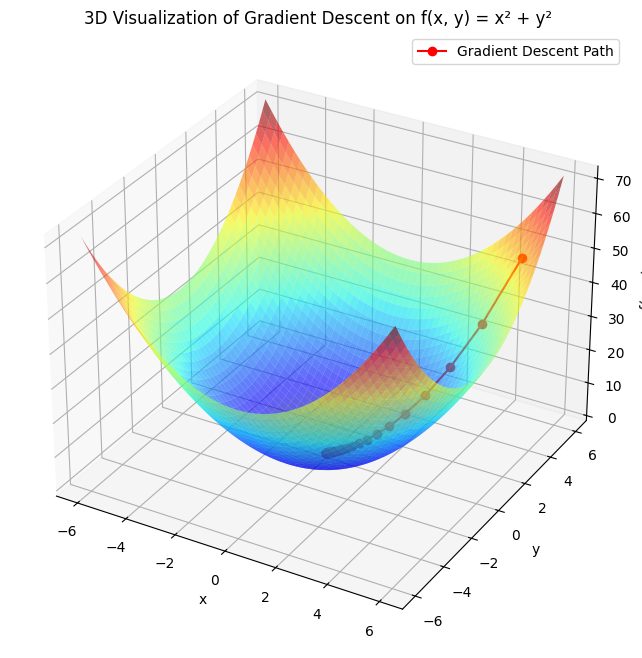

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3차원 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 함수 표면
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.6)

# 경사하강법 경로
Z_history = f(history[:,0], history[:,1])
ax.plot(history[:,0], history[:,1], Z_history, color='red', marker='o', label='Gradient Descent Path')

ax.set_title('3D Visualization of Gradient Descent on f(x, y) = x² + y²')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()